In [2]:
# Asktan work: 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
from time import strptime
from datetime import date
import re

# Import API key
from config import gkey

In [3]:
# Study data files
gun_data = "gun_violence.csv"
income_data = "percapita_income.csv"

# Read the mouse data and the study results
gun_data = pd.read_csv(gun_data,low_memory =False)
income_data = pd.read_csv(income_data)
income_data.head()

,State,County,2015,2016,2017
0,Alabama,Autauga,38591.0,39509.0,40484.0
1,Alabama,Baldwin,41412.0,43004.0,44079.0
2,Alabama,Barbour,31509.0,31750.0,33453.0
3,Alabama,Bibb,29048.0,28989.0,30022.0
4,Alabama,Blount,31987.0,32261.0,33707.0


In [4]:
gun_data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,274168,1/1/2015,Oklahoma,Tulsa,4840 South Memorial Dr,0,2,http://www.gunviolencearchive.org/incident/274168,http://www.tulsaworld.com/news/crimewatch/thre...,False,...,0::27||1::26,0::Adult 18+||1::Adult 18+,0::Female||1::Male,"2::Steven Desean ""Steezo"" Courtney",NaN,0::Injured||1::Injured||2::Unharmed,0::Victim||1::Victim||2::Subject-Suspect,http://www.tulsaworld.com/news/crimewatch/thre...,75.0,25.0
1,276211,1/1/2015,Louisiana,Labadieville,NaN,1,0,http://www.gunviolencearchive.org/incident/276211,http://www.wafb.com/story/27765450/investigato...,False,...,0::63,0::Adult 18+,0::Male,"0::Gordon Jones, Senior",NaN,0::Killed,0::Victim,http://www.wafb.com/story/27765450/investigato...,51.0,17.0
2,272302,1/1/2015,Mississippi,Hattiesburg,Nugget Court,0,0,http://www.gunviolencearchive.org/incident/272302,http://www.wdam.com/story/27743511/2-hattiesbu...,False,...,0::26,0::Adult 18+,0::Male,0::Terry Turner,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.wdam.com/story/27743511/2-hattiesbu...,102.0,45.0
3,272482,1/1/2015,Alabama,Bessemer,Bessemer Superhighway and Avenue P,0,2,http://www.gunviolencearchive.org/incident/272482,http://www.myfoxal.com/story/27742512/police-i...,False,...,NaN,NaN,0::Male||1::Male,NaN,NaN,0::Injured||1::Injured,0::Victim||1::Victim,http://www.myfoxal.com/story/27742512/police-i...,57.0,19.0
4,272487,1/1/2015,Illinois,Chicago,2200 block of North Narragansett Avenue,0,1,http://www.gunviolencearchive.org/incident/272487,http://www.chicagotribune.com/news/local/break...,False,...,NaN,NaN,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.chicagotribune.com/news/local/break...,3.0,2.0


In [5]:
uniq_incident= gun_data["incident_id"].nunique()
gun_data.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

In [6]:
#gun_data['year']=pd.DatetimeIndex(gun_data['date']).year
#gun_data['month']=pd.DatetimeIndex(gun_data['date']).month
#gun_data.head()

gun_data['date']= pd.to_datetime(gun_data['date']) 
gun_data['month'] = gun_data['date'].dt.month_name(locale = 'EN_US') 
gun_data['year'] = gun_data['date'].dt.year
gun_data.tail()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,month,year
173738,1018014,2017-12-31,South Carolina,Florence,200 Block of E Liberty St,0,0,http://www.gunviolencearchive.org/incident/101...,http://www.wmbfnews.com/story/37168117/florenc...,False,...,0::Male,0::Kevin Austin,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.wmbfnews.com/story/37168117/florenc...,59.0,30.0,December,2017
173739,1019711,2017-12-31,Florida,Cape Coral,5703 Cape Harbour Dr,0,0,http://www.gunviolencearchive.org/incident/101...,http://www.nbc-2.com/story/37178796/shots-fire...,False,...,0::Male,0::John Brinley,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.nbc-2.com/story/37178796/shots-fire...,77.0,27.0,December,2017
173740,1020965,2017-12-31,Florida,Saint Petersburg,170 Beach Dr NE,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.baynews9.com/content/news/baynews9/...,False,...,0::Male,0::James Higginbotham,NaN,0::Injured,0::Victim,http://www.baynews9.com/content/news/baynews9/...,68.0,19.0,December,2017
173741,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,http://www.gunviolencearchive.org/incident/101...,https://chicago.suntimes.com/news/man-wounded-...,False,...,0::Male||1::Male,NaN,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,https://chicago.suntimes.com/news/man-wounded-...,NaN,NaN,December,2017
173742,1019212,2017-12-31,Kentucky,Robards,11000 block of US 41,0,1,http://www.gunviolencearchive.org/incident/101...,http://www.14news.com/story/37398184/suspect-a...,False,...,0::Male||1::Male||2::Male,0::Reginald Brown II||1::Maurice Thompson,NaN,0::Injured||1::Unharmed||2::Unharmed,0::Victim||1::Subject-Suspect||2::Subject-Suspect,http://www.14news.com/story/37168754/man-shot-...,11.0,4.0,December,2017


In [7]:
gv_count_table = gun_data[["incident_id", "month", "year"]]
gv_count_table.head()

,incident_id,month,year
0,274168,January,2015
1,276211,January,2015
2,272302,January,2015
3,272482,January,2015
4,272487,January,2015


In [8]:
count_months = gv_count_table['month'].value_counts()
count_years = gv_count_table['year'].value_counts()
years = ["2015","2016","2017"]

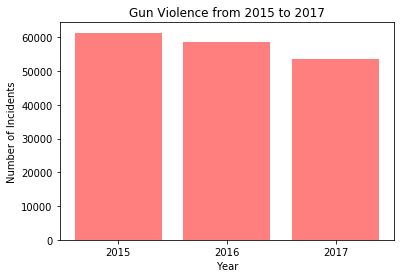

In [9]:
# Bar Showing the trend of gun violence in 3 years 2015 , 2016 ,2017: 
plt.bar(years, count_years, color='r', alpha=0.5, align="center")
plt.title("Gun Violence from 2015 to 2017")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.savefig("bar1.png")
plt.show()



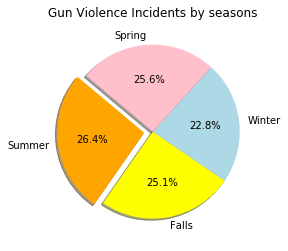

In [10]:
count_months_df = pd.DataFrame(count_months)
count_months_df
summer_incidents = count_months["June"] + count_months["July"] + count_months["August"]
fall_incidents = count_months["September"] + count_months["October"] + count_months["November"]
winter_incidents = count_months["December"] + count_months["January"] + count_months["February"]
spring_incidents = count_months["March"] + count_months["April"] + count_months["May"]

# Labels for the sections of our pie chart
labels = ["Summer", "Falls", "Winter", "Spring"]

# The values of each section of the pie chart
sizes = [summer_incidents, fall_incidents, winter_incidents, spring_incidents]

# The colors of each section of the pie chart
colors = ["orange", "yellow", "lightblue", "pink"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0)

# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Gun Violence Incidents by seasons")
plt.savefig("pieweather.png")
plt.show()

In [11]:
gv_count_table= gv_count_table.groupby(["month", "year"]).size().sort_values(ascending=False) \
  .reset_index(name='count of violence')
gv_count_table.head()

,month,year,count of violence
0,May,2017,5666
1,April,2017,5577
2,July,2017,5547
3,August,2016,5527
4,January,2017,5258


In [12]:
gv_count_table.to_csv("gv_by_monthandyear.csv")

In [13]:
gv_by_state = gun_data[["incident_id", "state","month", "year"]]
gv_by_state.head()

,incident_id,state,month,year
0,274168,Oklahoma,January,2015
1,276211,Louisiana,January,2015
2,272302,Mississippi,January,2015
3,272482,Alabama,January,2015
4,272487,Illinois,January,2015


In [14]:
gv_by_state = gv_by_state.groupby(["state", "month", "year"]).size().sort_values(ascending=False) \
  .reset_index(name='count of violence')
gv_by_state.head()


,state,month,year,count of violence
0,California,June,2017,572
1,Illinois,August,2016,543
2,California,July,2017,505
3,Illinois,October,2016,498
4,Illinois,June,2017,494


In [15]:
gv_by_state.to_csv("gv_by_state.csv")

Number of people killed in last 3 yr: 88250
Number of people injured in last 3 yr: 44061
Number of people involved in incident in last 3 yr: 67617


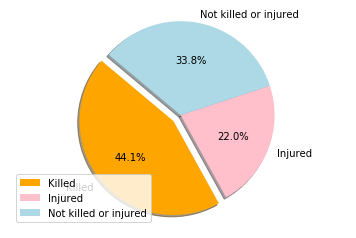

In [27]:
injured_count =gun_data["n_killed"].sum()
killed_count =gun_data["n_injured"].sum()
nofatal_count =0
for i in range(len(gun_data)):
    if gun_data["n_killed"][i] ==0 and gun_data["n_injured"][i] ==0  :
        nofatal_count = nofatal_count+1
        
print(f"Number of people killed in last 3 yr: {killed_count}")
print(f"Number of people injured in last 3 yr: {injured_count}")
print(f"Number of people involved in incident in last 3 yr: {nofatal_count}")

# Labels for the sections of our pie chart
labels = ["Killed", "Injured", "Not killed or injured"]

# The values of each section of the pie chart 
sizes = [killed_count, injured_count, nofatal_count]

# The colors of each section of the pie chart
colors = ["orange", "pink", "lightblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.legend()
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.savefig("piefatal.png")
plt.show()

In [17]:
gun_data[0:100]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,month,year
0,274168,2015-01-01,Oklahoma,Tulsa,4840 South Memorial Dr,0,2,http://www.gunviolencearchive.org/incident/274168,http://www.tulsaworld.com/news/crimewatch/thre...,False,...,0::Female||1::Male,"2::Steven Desean ""Steezo"" Courtney",NaN,0::Injured||1::Injured||2::Unharmed,0::Victim||1::Victim||2::Subject-Suspect,http://www.tulsaworld.com/news/crimewatch/thre...,75.0,25.0,January,2015
1,276211,2015-01-01,Louisiana,Labadieville,NaN,1,0,http://www.gunviolencearchive.org/incident/276211,http://www.wafb.com/story/27765450/investigato...,False,...,0::Male,"0::Gordon Jones, Senior",NaN,0::Killed,0::Victim,http://www.wafb.com/story/27765450/investigato...,51.0,17.0,January,2015
2,272302,2015-01-01,Mississippi,Hattiesburg,Nugget Court,0,0,http://www.gunviolencearchive.org/incident/272302,http://www.wdam.com/story/27743511/2-hattiesbu...,False,...,0::Male,0::Terry Turner,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.wdam.com/story/27743511/2-hattiesbu...,102.0,45.0,January,2015
3,272482,2015-01-01,Alabama,Bessemer,Bessemer Superhighway and Avenue P,0,2,http://www.gunviolencearchive.org/incident/272482,http://www.myfoxal.com/story/27742512/police-i...,False,...,0::Male||1::Male,NaN,NaN,0::Injured||1::Injured,0::Victim||1::Victim,http://www.myfoxal.com/story/27742512/police-i...,57.0,19.0,January,2015
4,272487,2015-01-01,Illinois,Chicago,2200 block of North Narragansett Avenue,0,1,http://www.gunviolencearchive.org/incident/272487,http://www.chicagotribune.com/news/local/break...,False,...,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.chicagotribune.com/news/local/break...,3.0,2.0,January,2015
5,272493,2015-01-01,Illinois,Chicago,5000 block of West Fulton Street,0,1,http://www.gunviolencearchive.org/incident/272493,http://www.chicagotribune.com/news/local/break...,False,...,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.chicagotribune.com/news/local/break...,8.0,4.0,January,2015
6,272490,2015-01-01,Illinois,Chicago,5600 block of West Fullerton,0,2,http://www.gunviolencearchive.org/incident/272490,http://www.chicagotribune.com/news/local/break...,False,...,0::Male||1::Male,NaN,NaN,0::Injured||1::Injured,0::Victim||1::Victim,http://www.chicagotribune.com/news/local/break...,3.0,2.0,January,2015
7,273244,2015-01-01,New Jersey,Plainfield,200 block of Richmond Street,1,0,http://www.gunviolencearchive.org/incident/273244,http://www.mycentraljersey.com/story/news/loca...,False,...,0::Male,0::Fatin Hunt,NaN,0::Killed,0::Victim,http://www.mycentraljersey.com/story/news/loca...,22.0,22.0,January,2015
8,273893,2015-01-01,Illinois,Chicago,6700 block of South California Avenue,0,1,http://www.gunviolencearchive.org/incident/273893,http://www.chicagotribune.com/news/local/break...,False,...,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.chicagotribune.com/news/local/break...,6.0,3.0,January,2015
9,272702,2015-01-01,Indiana,Lafayette,800 block of North 13th Street,0,0,http://www.gunviolencearchive.org/incident/272702,http://www.jconline.com/story/news/2015/01/02/...,False,...,NaN,NaN,NaN,NaN,NaN,http://www.jconline.com/story/news/2015/01/02/...,27.0,7.0,January,2015


In [18]:
# Countries vs Incidents: 

gun_file = "gun_violence.csv"
income_file = "percapita_income.csv"
data = pd.read_csv(gun_file)
income_data = pd.read_csv(income_file)
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,274168,1/1/2015,Oklahoma,Tulsa,4840 South Memorial Dr,0,2,http://www.gunviolencearchive.org/incident/274168,http://www.tulsaworld.com/news/crimewatch/thre...,False,...,0::27||1::26,0::Adult 18+||1::Adult 18+,0::Female||1::Male,"2::Steven Desean ""Steezo"" Courtney",NaN,0::Injured||1::Injured||2::Unharmed,0::Victim||1::Victim||2::Subject-Suspect,http://www.tulsaworld.com/news/crimewatch/thre...,75.0,25.0
1,276211,1/1/2015,Louisiana,Labadieville,NaN,1,0,http://www.gunviolencearchive.org/incident/276211,http://www.wafb.com/story/27765450/investigato...,False,...,0::63,0::Adult 18+,0::Male,"0::Gordon Jones, Senior",NaN,0::Killed,0::Victim,http://www.wafb.com/story/27765450/investigato...,51.0,17.0
2,272302,1/1/2015,Mississippi,Hattiesburg,Nugget Court,0,0,http://www.gunviolencearchive.org/incident/272302,http://www.wdam.com/story/27743511/2-hattiesbu...,False,...,0::26,0::Adult 18+,0::Male,0::Terry Turner,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.wdam.com/story/27743511/2-hattiesbu...,102.0,45.0
3,272482,1/1/2015,Alabama,Bessemer,Bessemer Superhighway and Avenue P,0,2,http://www.gunviolencearchive.org/incident/272482,http://www.myfoxal.com/story/27742512/police-i...,False,...,NaN,NaN,0::Male||1::Male,NaN,NaN,0::Injured||1::Injured,0::Victim||1::Victim,http://www.myfoxal.com/story/27742512/police-i...,57.0,19.0
4,272487,1/1/2015,Illinois,Chicago,2200 block of North Narragansett Avenue,0,1,http://www.gunviolencearchive.org/incident/272487,http://www.chicagotribune.com/news/local/break...,False,...,NaN,NaN,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.chicagotribune.com/news/local/break...,3.0,2.0


In [19]:
city = data[["city_or_county", "state"]]
city.head()

,city_or_county,state
0,Tulsa,Oklahoma
1,Labadieville,Louisiana
2,Hattiesburg,Mississippi
3,Bessemer,Alabama
4,Chicago,Illinois


In [20]:
group_city = city.groupby(["city_or_county"])

group_city_count = group_city.count()

group_city_sorted = group_city_count.sort_values(["state"], ascending=[False])

group_city_sorted.head()

,state
city_or_county,
Chicago,8256
Baltimore,2943
Washington,2245
New Orleans,2168
Jacksonville,2013


In [21]:
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

cities = group_city_sorted.index


city100 = cities[0:100]

county = ["M"]*100
    
try:
    
    for i in range(len(city100)):
    
        params = {"address": city100[i], "key": gkey}
        response = requests.get(base_url, params=params).json()
        county[i] = response["results"][0]["address_components"][1]["long_name"]
except:
    
    print("Small Error")
county

['Cook County',
 'Maryland',
 'United States',
 'Orleans Parish',
 'Duval County',
 'Shelby County',
 'Missouri',
 'Milwaukee County',
 'Philadelphia County',
 'Harris County',
 'Franklin County',
 'Cuyahoga County',
 'Marion County',
 'Suffolk County',
 'Springfield Township',
 'Bexar County',
 'Kings County',
 'Jefferson County',
 'Jackson County',
 'Wayne County',
 'Clark County',
 'Teton County',
 'Davidson County',
 'Virginia',
 'Fulton County',
 'Tulsa County',
 '1, Charlotte',
 'Wilmington',
 '7624',
 'Dallas County',
 'Peoria City Township',
 'Multnomah County',
 'Monroe County',
 'Erie County',
 'Jefferson County',
 'Hamilton County',
 'Allegheny County',
 'Fresno County',
 'Alameda County',
 'Orange County',
 'Rockford Township',
 'Maricopa County',
 'Los Angeles County',
 'Big Rock Township',
 'Jefferson Township',
 'Chicago',
 '6',
 'Fayette County',
 'Oklahoma County',
 'Essex County',
 'Parish Governing Authority District 12',
 'Bronx County',
 'Miami-Dade County',
 'Sedg

In [22]:
county[1] = "Baltimore County"
county[2] = "District of Columbia"
county[6] = "Saint Louis"
county[14] = "Greene County"
county[23] = "Richmond"
county[26] = "Mecklenburg County"
county[27] = "New Hanover County"
county[28] = "Oklahoma County"
county[30] = "Peoria County"
county[40] = "Winnebago County"
county[43] = "Pulaski County"
county[44] = "Montgomery County"
county[45] = "Cook County"
county[46] = "East Baton Rouge Parish"
county[50] = "Caddo Parish"
county[56] = "Mercer County"
county[60] = "Cook County"
county[67] = "Norfolk"
county[75] = "Allen County"
county[78] = "Newport News"
county[82] = "Lake County"
county[85] = "Montgomery County"
county[87] = "McMinn County"

In [23]:
group100 = group_city_sorted[0:100]
group100.head()


,state
city_or_county,
Chicago,8256
Baltimore,2943
Washington,2245
New Orleans,2168
Jacksonville,2013


In [24]:
group100["city or county"] = county
group100.head()

/Users/leonnguyen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,state,city or county
city_or_county,,
Chicago,8256,Cook County
Baltimore,2943,Baltimore County
Washington,2245,District of Columbia
New Orleans,2168,Orleans Parish
Jacksonville,2013,Duval County


In [25]:

group100 = group100.rename(columns={"state":"number of incident"})
group100.head()

,number of incident,city or county
city_or_county,,
Chicago,8256,Cook County
Baltimore,2943,Baltimore County
Washington,2245,District of Columbia
New Orleans,2168,Orleans Parish
Jacksonville,2013,Duval County


In [26]:
new_income_data = income_data[['County','Average']]
new_income_data = new_income_data.rename(columns={"County":"city or county"})
#new_income_data = new_income_data.set_index("city_or_county")
new_income_data.head()


KeyError: "['Average'] not in index"

In [ ]:
df_graph = pd.merge(group100, new_income_data, how = "outer", on ="city or county")
df_graph